In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('data deteksi outlier.xlsx')

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,55,Private,199067,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,29,Private,247445,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
2,49,Private,186078,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
3,31,Private,77634,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,42,United-States,<=50K
4,24,Private,180060,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,6849,0,90,United-States,<=50K


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Mengganti yg kosong supaya terbaca missing value

In [9]:
data = data.replace(' ?', np.nan) #ganti space jadi nan biar kebaca missingnya

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    296 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Memisahkan kolom2

In [18]:
Y = ['type']
X_int = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_cat = ['workclass','education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [19]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

## Melihat jumlah kelas

In [20]:
#show all distinct value of class
print(data_Y['type'].unique())

[' >50K' ' <=50K']


### mengganti missing data

In [21]:
## find missing data for each data type and fill it with mean and mode
data_int_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
        
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [22]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

## NORMALIZE

In [23]:
from sklearn.preprocessing import Normalizer 

In [25]:
data['age'] = Normalizer().fit(data[['age']]).transform(data[['age']])
data['fnlwgt'] = Normalizer().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data['education-num'] = Normalizer().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = Normalizer().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = Normalizer().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = Normalizer().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,1.0,Private,1.0,HS-grad,1.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,1.0,United-States,>50K
1,1.0,Private,1.0,HS-grad,1.0,Divorced,Sales,Not-in-family,White,Male,0.0,0.0,1.0,United-States,<=50K
2,1.0,Private,1.0,Masters,1.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,1.0,United-States,>50K
3,1.0,Private,1.0,Assoc-voc,1.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,1.0,United-States,<=50K
4,1.0,Private,1.0,Masters,1.0,Never-married,Exec-managerial,Own-child,White,Male,1.0,0.0,1.0,United-States,<=50K


### deteksi outlier

In [26]:
### for detect outlier
data_type = pd.concat([data_int_clean, data_Y], axis=1) #untuk menggabungkan datanya

In [27]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

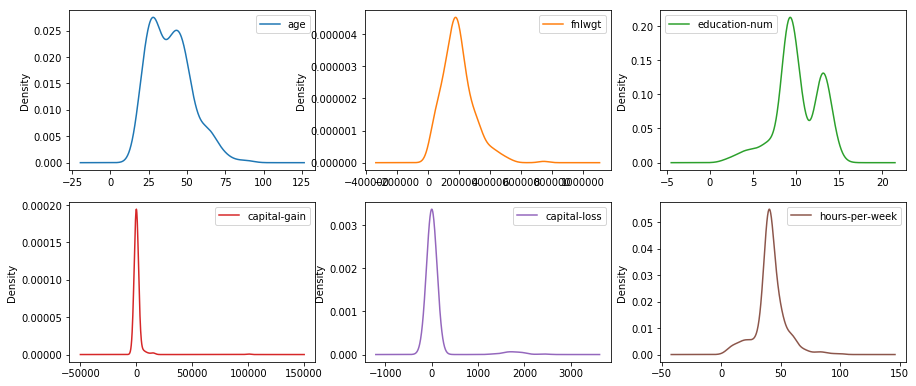

In [28]:
# Univariate Density Plots
data_type.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False) #melihat distribusinya
plt.show()

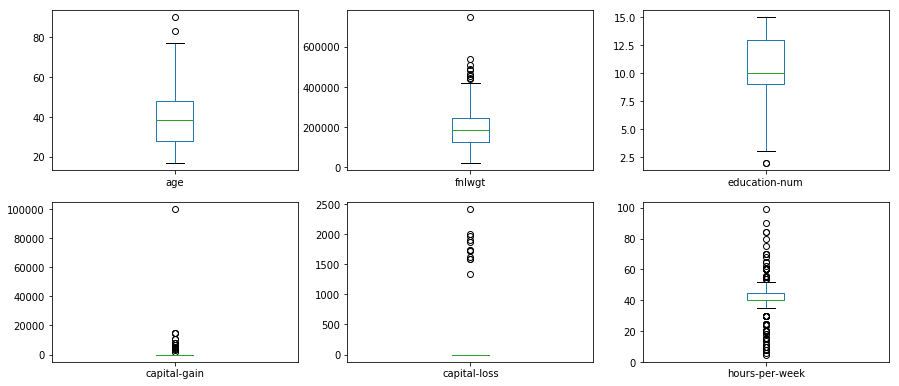

In [29]:
data_type.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [32]:
colors_palette = {" >50K": "red",  " <=50K": "blue"}
colors = [colors_palette[c] for c in data_type['type']]   

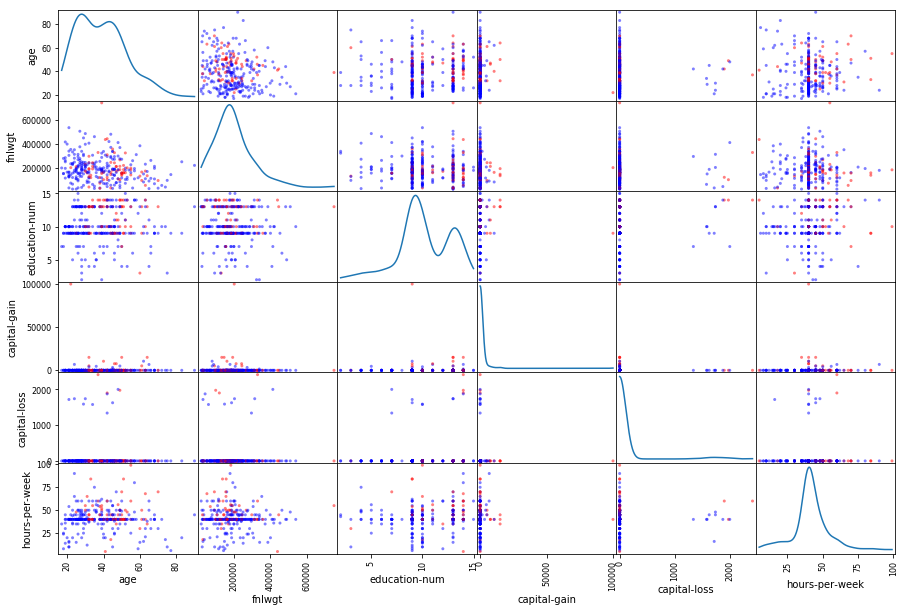

In [34]:
## red : <50K
## blue: >=50K
from pandas.plotting import scatter_matrix
scatter_matrix(data_type, color=colors, diagonal='kde')
plt.show()

In [35]:
data_cleaned = pd.concat([data_type, data_cat_clean], axis=1)

In [41]:
data_cleaned.to_excel('data_deteksi_outlier_cleaned.xlsx', index=0)

In [ ]:
data = pd.read_csv('data deteksi outlier.xlsx')